In [1]:
import pandas as pd
import os
import glob

# Step 1: Load your SDG CSV files again
folder_path = "C:/Users/WELCOME/Desktop/17 SDGs/Sustainable_Goals"
csv_files = glob.glob(os.path.join(folder_path, "**/*.csv"), recursive=True)

all_data = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        df['sdg'] = os.path.basename(file).replace(".csv", "")
        all_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

data = pd.concat(all_data, ignore_index=True)
print(f"✅ Combined shape: {data.shape}")


✅ Combined shape: (7459, 28)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Step 1: Clean abstracts ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

data = data[pd.notnull(data['Abstract'])]
data['clean_abstract'] = data['Abstract'].apply(clean_text)

# --- Step 2: Vectorize abstracts ---
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(data['clean_abstract'])

# --- Step 3: Fit LDA model ---
lda_model = LatentDirichletAllocation(n_components=7, random_state=42)
lda_model.fit(dtm)

# --- Step 4: Assign dominant topic to each document ---
topic_results = lda_model.transform(dtm)
data['LDA_Topic'] = topic_results.argmax(axis=1)

# --- Step 5: Count topics per year ---
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]
data['Year'] = data['Year'].astype(int)

topic_year = data.groupby(['Year', 'LDA_Topic']).size().unstack(fill_value=0)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Get top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

# Show top 10 words for each topic
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)


Topic 0:  ['nepal', 'climate', 'change', 'water', 'land', 'study', 'development', 'urban', 'management', 'agriculture']
Topic 1:  ['study', 'nepal', 'waste', 'vegetable', 'farmers', 'construction', 'covid', 'health', 'data', 'safety']
Topic 2:  ['nepal', 'study', 'energy', 'economic', 'growth', 'development', 'water', 'data', 'government', 'paper']
Topic 3:  ['nepal', 'health', 'education', 'women', 'gender', 'study', 'research', 'mental', 'social', 'tourism']
Topic 4:  ['study', 'patients', 'age', 'years', 'common', 'nepal', 'hospital', 'data', 'results', 'disease']
Topic 5:  ['water', 'study', 'production', 'nepal', 'area', 'flood', 'total', 'river', 'quality', 'samples']
Topic 6:  ['yield', 'nepal', 'study', 'seed', 'different', 'class', 'malocclusion', 'grain', 'plant', 'used']


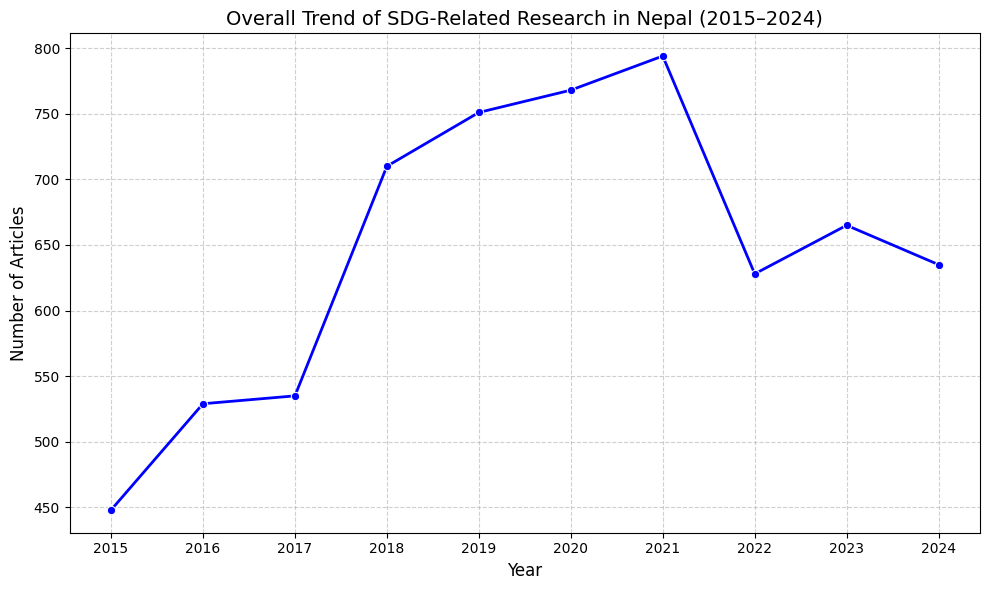

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure clean 'Year'
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]
data['Year'] = data['Year'].astype(int)

# Define full range of years
year_range = list(range(2015, 2025))  # Adjust if needed

# Count articles per year
yearly_counts = data['Year'].value_counts().sort_index()
yearly_counts = yearly_counts[yearly_counts.index <= 2024]

# Fill missing years with 0
yearly_counts = yearly_counts.reindex(year_range, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2, color='blue')
plt.title('Overall Trend of SDG-Related Research in Nepal (2015–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(year_range)  # Force x-axis to show all years
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("overall_sdg_research_trend_all_years.png")
plt.show()


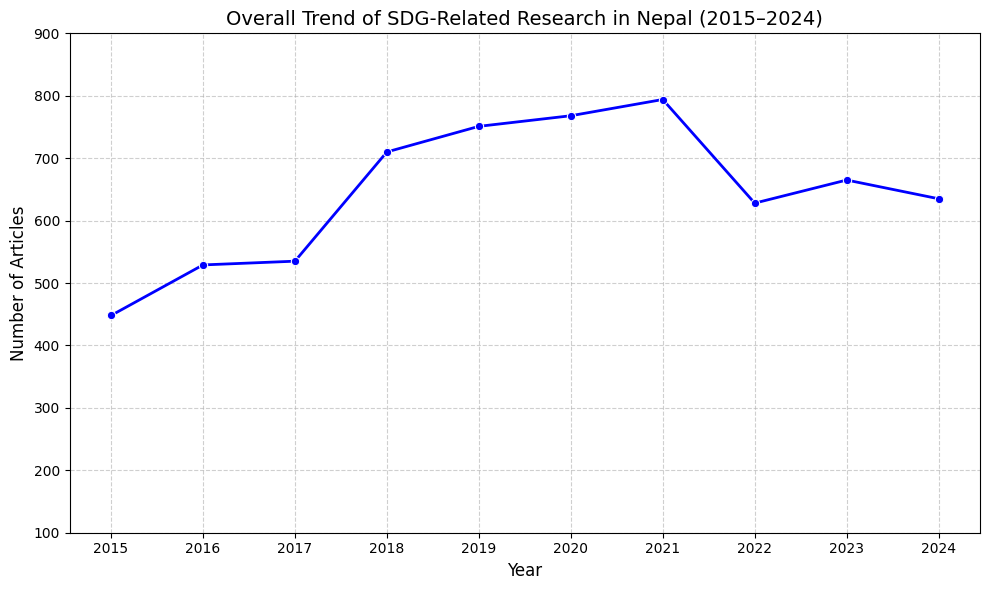

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure clean 'Year'
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]
data['Year'] = data['Year'].astype(int)

# Define full range of years
year_range = list(range(2015, 2025))  # Adjust if needed

# Count articles per year
yearly_counts = data['Year'].value_counts().sort_index()
yearly_counts = yearly_counts[yearly_counts.index <= 2024]

# Fill missing years with 0
yearly_counts = yearly_counts.reindex(year_range, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2, color='blue')
plt.title('Overall Trend of SDG-Related Research in Nepal (2015–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(year_range)  # Force x-axis to show all years

# Set y-axis from 100 to 900 with step of 100
plt.ylim(100, 900)
plt.yticks(range(100, 901, 100))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("overall_sdg_research_trend_all_years.png")
plt.show()


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of articles per SDG (from the 'sdg' column)
sdg_counts = data['sdg'].value_counts().sort_values(ascending=True)



In [7]:
# Map LDA topic numbers to SDG labels
topic_labels = {
    0: "SDG 3: Health",
    1: "SDG 4: Education",
    2: "SDG 2: Zero Hunger",
    3: "SDG 13: Climate Action",
    4: "SDG 6: Clean Water",
    5: "SDG 8: Decent Work",
    6: "SDG 5: Gender Equality"
}

topic_year_renamed = topic_year.rename(columns=topic_labels)


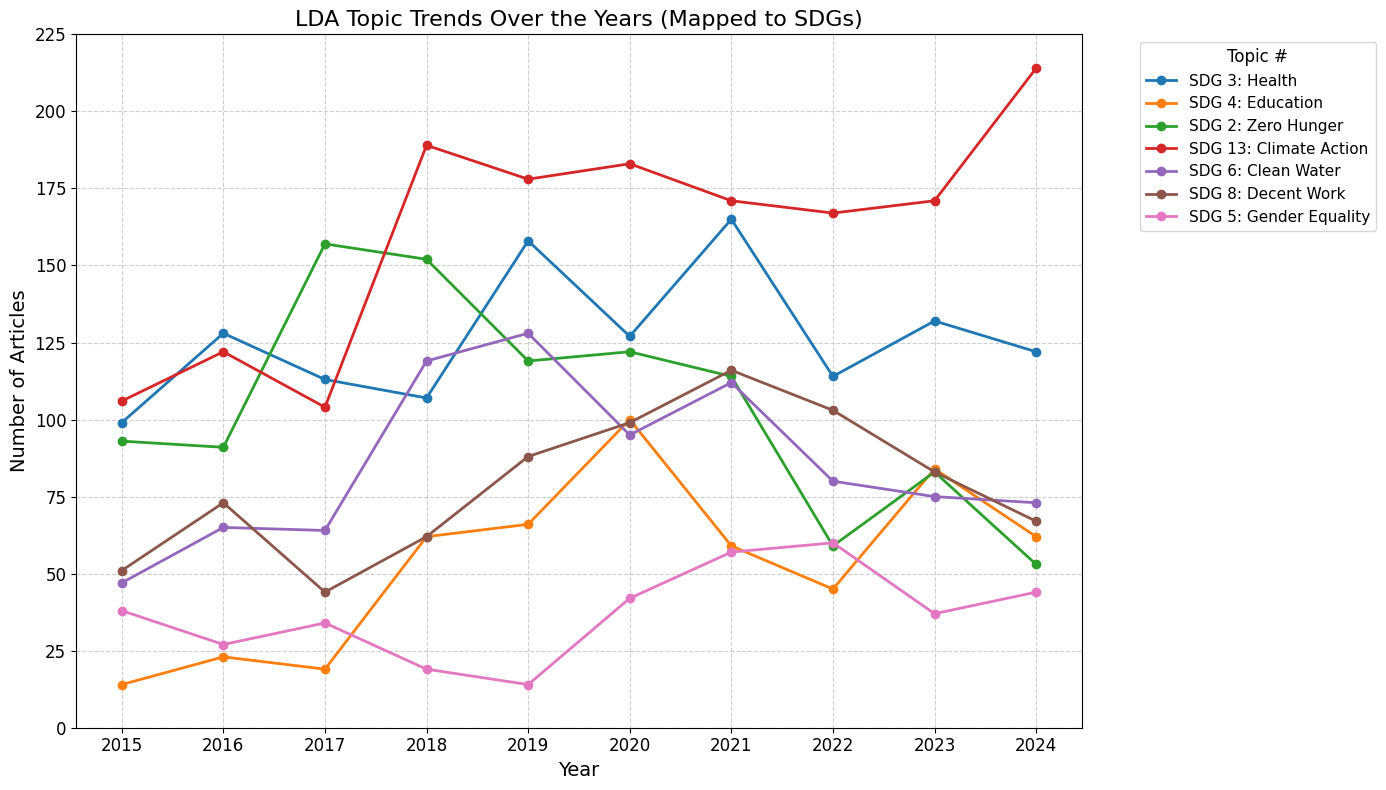

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Filter years to 2014–2024 and fill any missing years
topic_year_renamed.index = topic_year_renamed.index.astype(int)
topic_year_renamed = topic_year_renamed[topic_year_renamed.index <= 2024]
all_years = list(range(2015, 2025))
topic_year_renamed = topic_year_renamed.reindex(all_years, fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
topic_year_renamed.plot(marker='o', linewidth=2, markersize=6, ax=plt.gca())

plt.title('LDA Topic Trends Over the Years (Mapped to SDGs)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)

plt.xticks(ticks=all_years, fontsize=12)
plt.yticks(ticks=np.arange(0, topic_year_renamed.values.max() + 25, 25), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Legend without renaming columns
plt.legend(title='Topic #', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, title_fontsize=12)

plt.tight_layout()
plt.savefig("lda_rq1_topic_trend_sdg_names_clean.png", bbox_inches='tight')
plt.show()


<Figure size 1200x700 with 0 Axes>

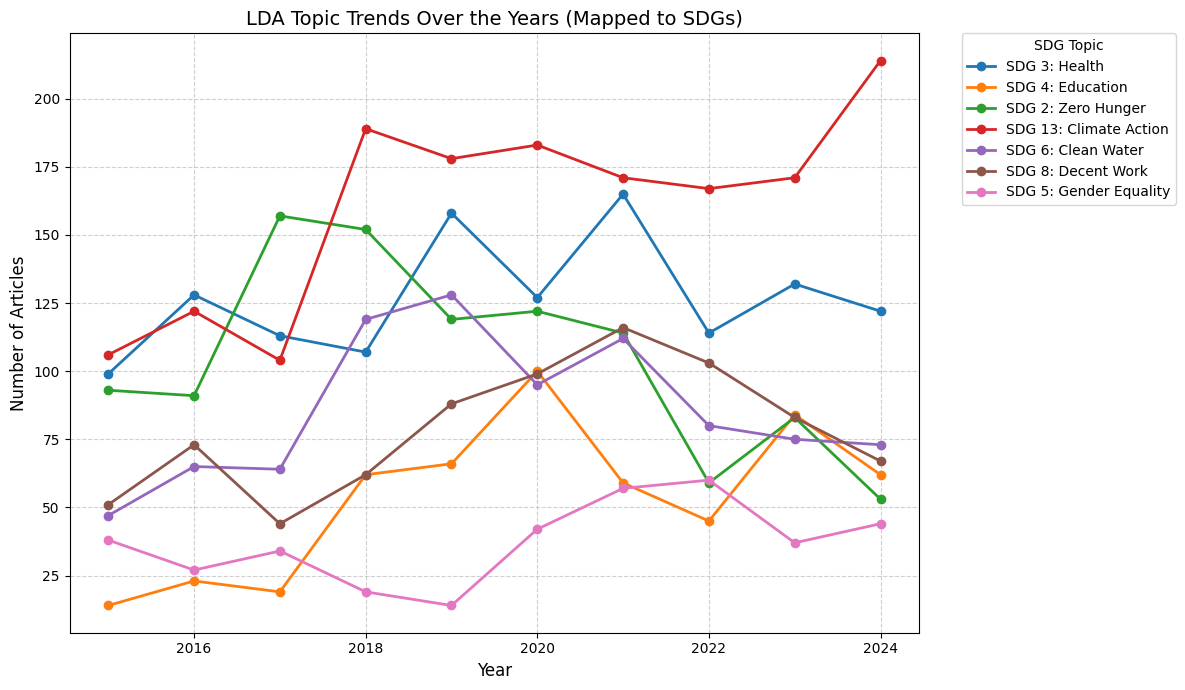

In [9]:
import matplotlib.pyplot as plt

# Filter to exclude 2025 and beyond
topic_year_renamed = topic_year_renamed[topic_year_renamed.index <= 2024]

# Plot
plt.figure(figsize=(12, 7))
topic_year_renamed.plot(marker='o', linewidth=2, markersize=6, figsize=(12, 7))

plt.title('LDA Topic Trends Over the Years (Mapped to SDGs)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Legend formatting
plt.legend(title='SDG Topic', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig("lda_rq1_topic_trend_sdg_2014_2024.png", bbox_inches='tight')
plt.show()


<Figure size 1200x700 with 0 Axes>

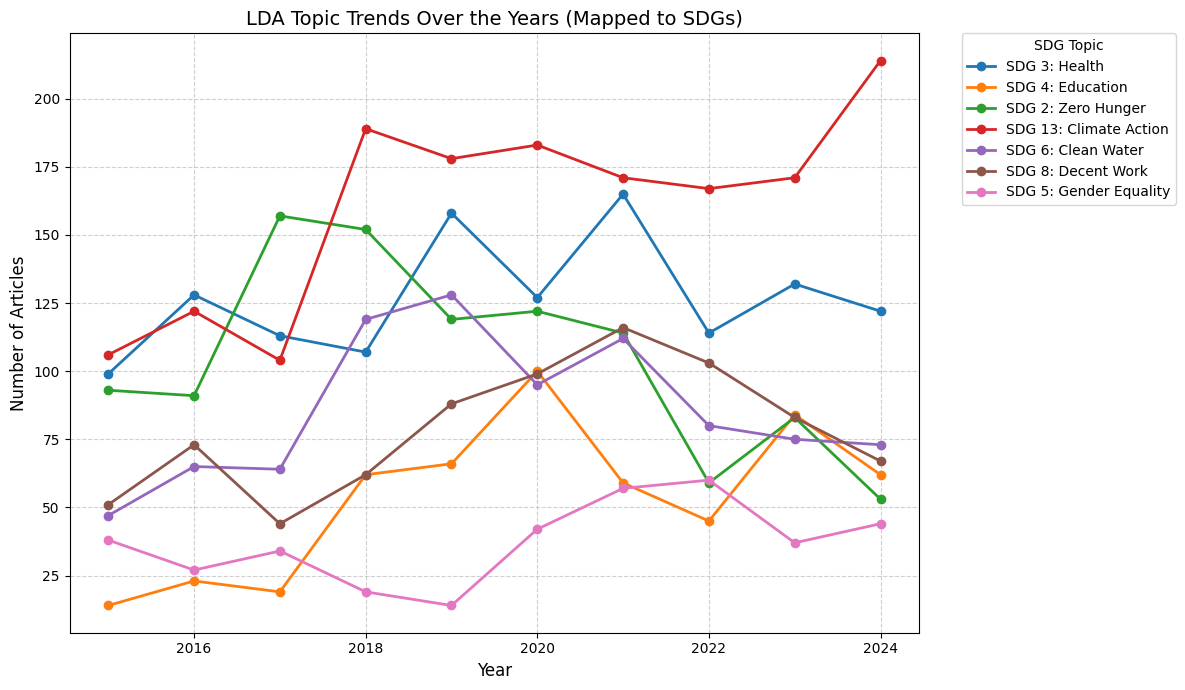

In [10]:
import matplotlib.pyplot as plt

# Plot with improved formatting
plt.figure(figsize=(12, 7))
topic_year_renamed.plot(marker='o', linewidth=2, markersize=6, figsize=(12, 7))

plt.title('LDA Topic Trends Over the Years (Mapped to SDGs)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Move legend outside the plot
plt.legend(title='SDG Topic', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.savefig("lda_rq1_topic_trend_sdg_names_clean.png", bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
from matplotlib import cm
import numpy as np

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load your topic summary CSV
df = pd.read_csv(r"C:\Users\WELCOME\Desktop\17 SDGs\bert_topic_summary.csv")

# Ensure the 'Representation' column exists
if 'Representation' not in df.columns:
    raise ValueError("CSV must contain a 'Representation' column.")

# Process and lemmatize all keywords
all_lemmas = []
for rep in df['Representation']:
    keywords = eval(rep) if isinstance(rep, str) else []
    for kw in keywords:
        doc = nlp(kw)
        for token in doc:
            if not token.is_stop and token.is_alpha:
                all_lemmas.append(token.lemma_.lower())

# Count frequency of lemmatized keywords
lemma_counts = Counter(all_lemmas)
top_lemmas = lemma_counts.most_common(50)  # Adjust number if needed

# Convert to DataFrame for plotting
df_lemmas = pd.DataFrame(top_lemmas, columns=["Keyword", "Frequency"])

# Normalize frequency for sizing and positioning
df_lemmas["Size"] = df_lemmas["Frequency"] * 20
df_lemmas["x"] = np.random.normal(0, 1, len(df_lemmas))
df_lemmas["y"] = np.random.normal(0, 1, len(df_lemmas))

# Plot bubble chart
plt.figure(figsize=(14, 10))
scatter = plt.scatter(df_lemmas["x"], df_lemmas["y"], s=df_lemmas["Size"],
                      alpha=0.6, c=df_lemmas["Frequency"], cmap="viridis", edgecolors="k", linewidths=1)

# Add text labels
for _, row in df_lemmas.iterrows():
    plt.text(row["x"], row["y"], row["Keyword"],
             ha='center', va='center', fontsize=row["Frequency"] * 0.5,
             color='black', fontweight='bold')

plt.axis('off')
plt.title("Dominant Research Themes Related to SDGs in Nepal", fontsize=16, weight='bold')
plt.show()


In [ ]:
import numpy as np
from sklearn.manifold import TSNE

# Get word vectors from spaCy (excluding empty ones)
vectors = [nlp(keyword).vector for keyword in df_lemmas["Keyword"] if nlp(keyword).has_vector]
valid_keywords = [keyword for keyword in df_lemmas["Keyword"] if nlp(keyword).has_vector]

# Convert list of vectors to 2D NumPy array
vectors_np = np.array(vectors)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords = tsne.fit_transform(vectors_np)

# Update DataFrame (only for keywords with vectors)
df_tsne = df_lemmas[df_lemmas["Keyword"].isin(valid_keywords)].copy()
df_tsne["x"] = coords[:, 0]
df_tsne["y"] = coords[:, 1]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare frequency dictionary from your top lemmas
freq_dict = dict(zip(df_lemmas["Keyword"], df_lemmas["Frequency"]))

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      colormap='viridis', max_words=100).generate_from_frequencies(freq_dict)

# Plot
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Dominant Research Themes Related to SDGs in Nepal", fontsize=16, weight='bold')
plt.show()


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cairosvg
from collections import Counter

# Load your topic summary CSV (adjust path accordingly)
df = pd.read_csv(r"C:\Users\WELCOME\Desktop\17 SDGs\bert_topic_summary.csv")

# Ensure the 'Representation' column exists
if 'Representation' not in df.columns:
    raise ValueError("CSV must contain a 'Representation' column.")

# Process and extract keywords
df["Keywords"] = df["Representation"].apply(eval)
all_keywords = [kw for sublist in df["Keywords"] for kw in sublist]

# Count keyword frequencies
keyword_counts = Counter(all_keywords)

# Prepare the word frequencies for the word cloud
word_freq = dict(keyword_counts.most_common(100))

# Convert the SVG of Nepal map to PNG for the word cloud mask
svg_path = r"C:\Users\WELCOME\Downloads\nepal.svg"  # Adjust path accordingly
png_path = r"C:\Users\WELCOME\Downloads.svg"  # Save path for PNG output

# Convert SVG to PNG using cairosvg
cairosvg.svg2png(url=svg_path, write_to=png_path)

# Load the mask image
mask_image = np.array(Image.open(png_path))

# Generate word cloud with Nepal map mask
wordcloud = WordCloud(width=800, height=800, background_color="white",
                      mask=mask_image, contour_width=1, contour_color='black',
                      colormap='viridis', max_words=100).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Dominant Research Themes in Nepal", fontsize=16, weight='bold')
plt.show()


## Research Question 3




In [11]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Use your cleaned abstracts
docs = data['Abstract'].dropna().tolist()

# Create and fit model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)



In [12]:
topics_info = topic_model.get_topic_info()
topics_info.head(10)



,Topic,Count,Name,Representation,Representative_Docs
0,-1,975,-1_in_and_of_to,"[in, and, of, to, the, for, nepal, were, this,...",[Background: Migration is a livelihood strateg...
1,0,203,0_health_insurance_de_la,"[health, insurance, de, la, nepal, tobacco, fa...",[Nepal has one of the highest proportions of o...
2,1,164,1_poverty_inequality_multidimensional_households,"[poverty, inequality, multidimensional, househ...",[… household poverty … poverty and remain out ...
3,2,113,2_education_school_schools_nepal,"[education, school, schools, nepal, inclusive,...",[… for quality education in government schools...
4,3,80,3_climate_change_adaptation_agriculture,"[climate, change, adaptation, agriculture, cro...",[Nepal is one of the four most vulnerable coun...
5,4,77,4_water_drinking_supply_sanitation,"[water, drinking, supply, sanitation, schemes,...",[Groundwater has always played a critical role...
6,5,73,5_jatspnajatsp___,"[jatspnajatsp, , , , , , , , , ]","[<jats:p>N/A</jats:p>, <jats:p>N/A</jats:p>, <..."
7,6,73,6_remittance_foreign_employment_migration,"[remittance, foreign, employment, migration, r...","[In recent decades, the increasing inflow of r..."
8,7,66,7_text_full_available_in,"[text, full, available, in, tra, manuscript, b...","[Available in full text. , Available in full t..."
9,8,59,8_covid19_scores_workers_healthcare,"[covid19, scores, workers, healthcare, pandemi...",[<title>Abstract</title> <p>Background COVID-1...


In [13]:
# Remove topic -1 (noise), 5 and 7 (junk content)
clean_topics_info = topics_info[
    ~topics_info['Topic'].isin([-1, 5, 7])
].reset_index(drop=True)

# Display top cleaned topics
clean_topics_info.head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,0,203,0_health_insurance_de_la,"[health, insurance, de, la, nepal, tobacco, fa...",[Nepal has one of the highest proportions of o...
1,1,164,1_poverty_inequality_multidimensional_households,"[poverty, inequality, multidimensional, househ...",[… household poverty … poverty and remain out ...
2,2,113,2_education_school_schools_nepal,"[education, school, schools, nepal, inclusive,...",[… for quality education in government schools...
3,3,80,3_climate_change_adaptation_agriculture,"[climate, change, adaptation, agriculture, cro...",[Nepal is one of the four most vulnerable coun...
4,4,77,4_water_drinking_supply_sanitation,"[water, drinking, supply, sanitation, schemes,...",[Groundwater has always played a critical role...
5,6,73,6_remittance_foreign_employment_migration,"[remittance, foreign, employment, migration, r...","[In recent decades, the increasing inflow of r..."
6,8,59,8_covid19_scores_workers_healthcare,"[covid19, scores, workers, healthcare, pandemi...",[<title>Abstract</title> <p>Background COVID-1...
7,9,56,9_hydropower_electricity_power_energy,"[hydropower, electricity, power, energy, gener...",[This paper is prepared on the answer to the v...
8,10,55,10_maternal_health_child_care,"[maternal, health, child, care, neonatal, skil...",[Maternal health is the health status of women...
9,11,52,11_carnation_cut_performance_employee,"[carnation, cut, performance, employee, employ...",[Carnation is an important cut flower commerci...


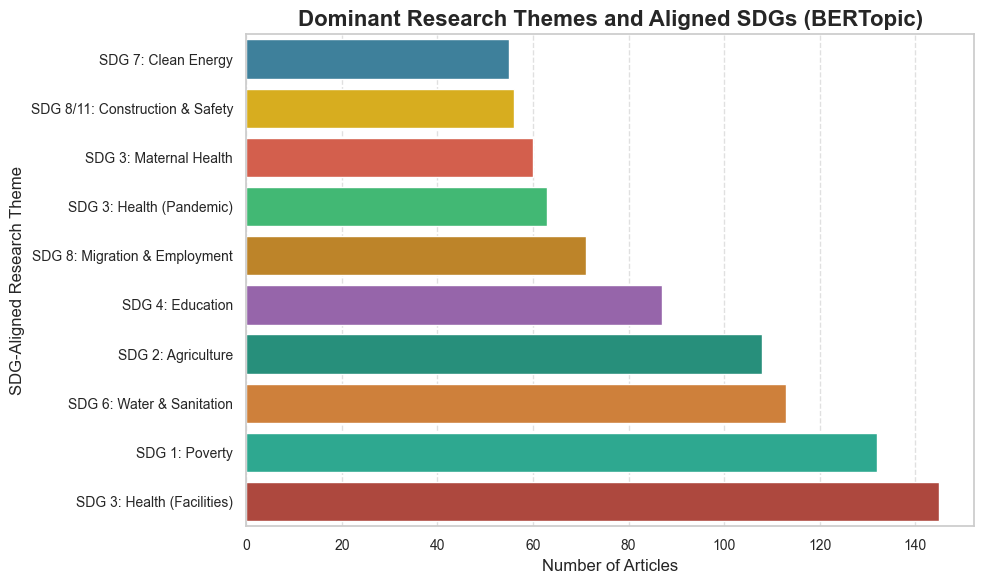

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: SDG themes and counts
sdg_labels_primary = [
    "SDG 3: Health (Facilities)",
    "SDG 1: Poverty",
    "SDG 6: Water & Sanitation",
    "SDG 2: Agriculture",
    "SDG 4: Education",
    "SDG 8: Migration & Employment",
    "SDG 3: Health (Pandemic)",
    "SDG 3: Maternal Health",
    "SDG 8/11: Construction & Safety",
    "SDG 7: Clean Energy"
]

article_counts_primary = [145, 132, 113, 108, 87, 71, 63, 60, 56, 55]  # Example values

# Sort data for descending trend (bottom to top)
df = pd.DataFrame({'Theme': sdg_labels_primary, 'Count': article_counts_primary})
df = df.sort_values(by='Count', ascending=True)  # reverse order for bottom-up

# Custom color palette (optional — you can reuse the bright one here if you want)
colors = [
    "#2E86AB", "#F6BE00", "#E94F37", "#2ECC71", "#D68910",
    "#9B59B6", "#16A085", "#E67E22", "#1ABC9C", "#C0392B"
]

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Count', y='Theme', data=df, palette=colors)

# Labels and style
plt.title("Dominant Research Themes and Aligned SDGs (BERTopic)", fontsize=16, weight='bold')
plt.xlabel("Number of Articles", fontsize=12)
plt.ylabel("SDG-Aligned Research Theme", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig("rq2_primary_sdg_descending.png", dpi=300)
plt.show()


In [15]:
# Show BERTopic topics ranked 12 to 30 (excluding -1 and earlier shown ones)
topics_info[~topics_info['Topic'].isin([-1, 5, 7])].iloc[10:30]


,Topic,Count,Name,Representation,Representative_Docs
13,12,52,12_july_availablehydro_date_2017page,"[july, availablehydro, date, 2017page, 21, 18,...",[Not Available. HYDRO Nepal JournalJournal of ...
14,13,48,13_mental_health_competency_supervision,"[mental, health, competency, supervision, equa...",[Mental health is a neglected area and the act...
15,14,47,14_valve_mitral_cardiac_aortic,"[valve, mitral, cardiac, aortic, heart, atrial...",[Introduction: Rheumatic heart disease is a se...
16,15,47,15_construction_safety_projects_risk,"[construction, safety, projects, risk, buildin...",[The COVID-19 pandemic caused disruptions in b...
17,16,46,16_jatspnajatsp_na_jatsp_mathjax,"[jatspnajatsp, na, jatsp, mathjax, formulae, m...","[<jats:p>NA</jats:p>, <jats:p>NA</jats:p>, For..."
18,17,46,17_pes_conservation_ecosystem_services,"[pes, conservation, ecosystem, services, mecha...","[As a stewardship for watershed services, an i..."
19,18,44,18_gender_equality_women_womens,"[gender, equality, women, womens, election, po...",[A Kaleidoscopic View of Gender Issues in Sout...
20,19,42,19_disaster_management_act_preparedness,"[disaster, management, act, preparedness, risk...",[This paper is a review of policies for disast...
21,20,42,20_species_habitat_mammals_threats,"[species, habitat, mammals, threats, km, conse...",[Wildlife corridors connect isolated patches o...
22,21,42,21_corruption_political_election_economic,"[corruption, political, election, economic, gr...",[Nepal is the 122nd least corrupt nations out ...


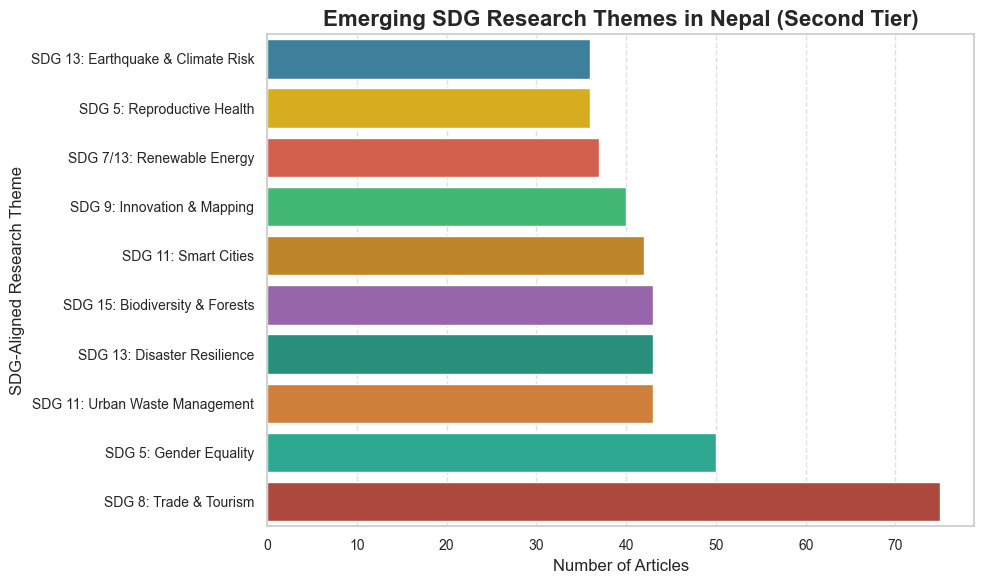

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
sdg_labels_tier2 = [
    "SDG 5: Gender Equality",
    "SDG 13: Disaster Resilience",
    "SDG 15: Biodiversity & Forests",
    "SDG 11: Urban Waste Management",
    "SDG 11: Smart Cities",
    "SDG 7/13: Renewable Energy",
    "SDG 13: Earthquake & Climate Risk",
    "SDG 5: Reproductive Health",
    "SDG 9: Innovation & Mapping",
    "SDG 8: Trade & Tourism"
]

article_counts_tier2 = [50, 43, 43, 43, 42, 37, 36, 36, 40, 75]

# Sort data
df = pd.DataFrame({'Theme': sdg_labels_tier2, 'Count': article_counts_tier2})
df = df.sort_values(by='Count', ascending=True)

# Define a vibrant custom color palette (10 distinct, vivid colors)
custom_colors = [
    "#2E86AB",  # Blue
    "#F6BE00",  # Yellow
    "#E94F37",  # Red
    "#2ECC71",  # Green
    "#D68910",  # Orange
    "#9B59B6",  # Purple
    "#16A085",  # Teal
    "#E67E22",  # Orange
    "#1ABC9C",  # Aqua
    "#C0392B"   # Dark Red
]

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Count', y='Theme', data=df, palette=custom_colors)

# Labels and aesthetics
plt.title("Emerging SDG Research Themes in Nepal (Second Tier)", fontsize=16, weight='bold')
plt.xlabel("Number of Articles", fontsize=12)
plt.ylabel("SDG-Aligned Research Theme", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig("rq2_emerging_sdgs_brightcolors.png", dpi=300)
plt.show()


In [17]:
topics_df = topic_model.get_topic_info()
topics_df[['Topic', 'Name', 'Representation']].to_csv("bert_topics_all.csv", index=False)


In [18]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

# === Step 1: Load cleaned SDG data ===
file_path = r"C:\Users\WELCOME\Desktop\17 SDGs\cleaned_sdg_nepal.csv"
data = pd.read_csv(file_path)

# === Step 2: Extract and clean abstracts ===
abstracts = data['cleaned_text'].dropna().tolist()


# === Step 3: Generate embeddings ===
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

# === Step 4: Fit BERTopic model ===
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(abstracts, embeddings)

# === Step 5: Save results ===
data['dominant_topic'] = topics
data.to_csv(r"C:\Users\WELCOME\Desktop\17 SDGs\bert_topic_results.csv", index=False)
topic_model.get_topic_info().to_csv(r"C:\Users\WELCOME\Desktop\17 SDGs\bert_topic_summary.csv", index=False)

# === Step 6: Optional Preview ===
print(topic_model.get_topic_info().head(10))


Batches:   0%|          | 0/225 [00:00<?, ?it/s]

   Topic  Count                                               Name  \
0     -1   1312                      -1_vegetable_water_food_urban   
1      0    199        0_poverty_multidimensional_reduction_madhes   
2      1    192                     1_gender_woman_equality_womens   
3      2    153                 2_education_school_language_higher   
4      3    109                 3_production_seed_farmer_marketing   
5      4     98                  4_maternal_health_newborn_service   
6      5     90          5_climate_change_adaptation_vulnerability   
7      6     81                  6_parthenium_greater_lion_looking   
8      7     77  7_ecosystem_service_forest_interfaceincentivizing   
9      8     62        8_economics_marketing_production_beekeeping   

                                      Representation  \
0  [vegetable, water, food, urban, nepal, system,...   
1  [poverty, multidimensional, reduction, madhes,...   
2  [gender, woman, equality, womens, empowerment,...   
3  [e

In [19]:
import pandas as pd
file_path = r"C:\Users\WELCOME\Desktop\17 SDGs\cleaned_sdg_nepal.csv"
data = pd.read_csv(file_path)
print(data.columns)


Index(['Cites', 'Authors', 'Title', 'Year', 'Source', 'Publisher',
       'ArticleURL', 'CitesURL', 'GSRank', 'QueryDate', 'Type', 'DOI', 'ISSN',
       'CitationURL', 'Volume', 'Issue', 'StartPage', 'EndPage', 'ECC',
       'CitesPerYear', 'CitesPerAuthor', 'AuthorCount', 'Age', 'Abstract',
       'FullTextURL', 'RelatedURL', 'SDG_Goal', 'text', 'cleaned_text'],
      dtype='object')
